In [1]:
from tensorflow.keras.layers import *
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(0)

In [2]:
# load data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

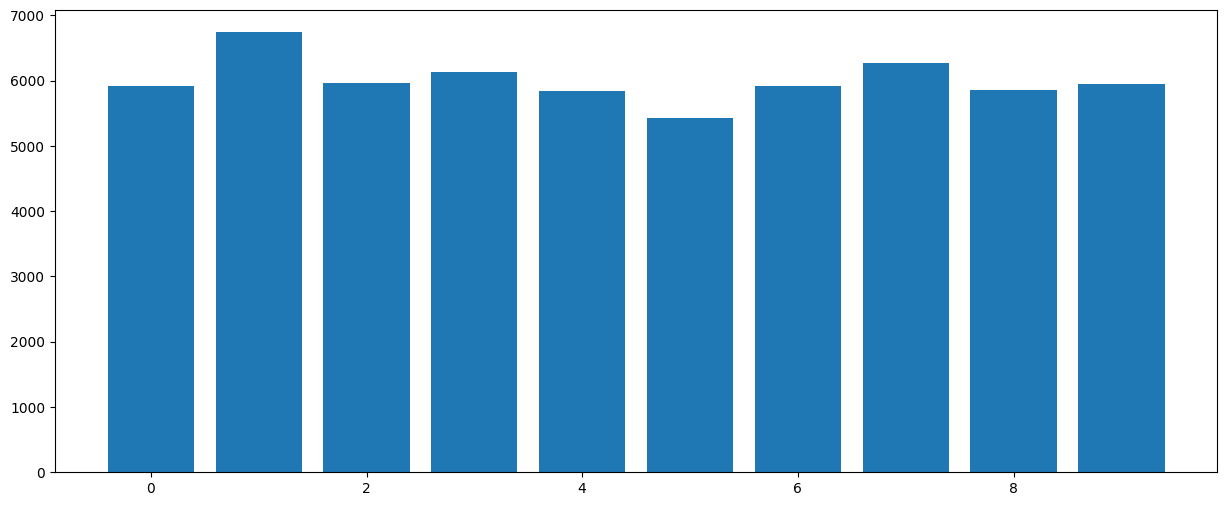

In [3]:
# labels count

plt.figure(figsize=(15,6))
plt.bar(range(10), np.unique(y_train, return_counts=True)[1])
plt.show()

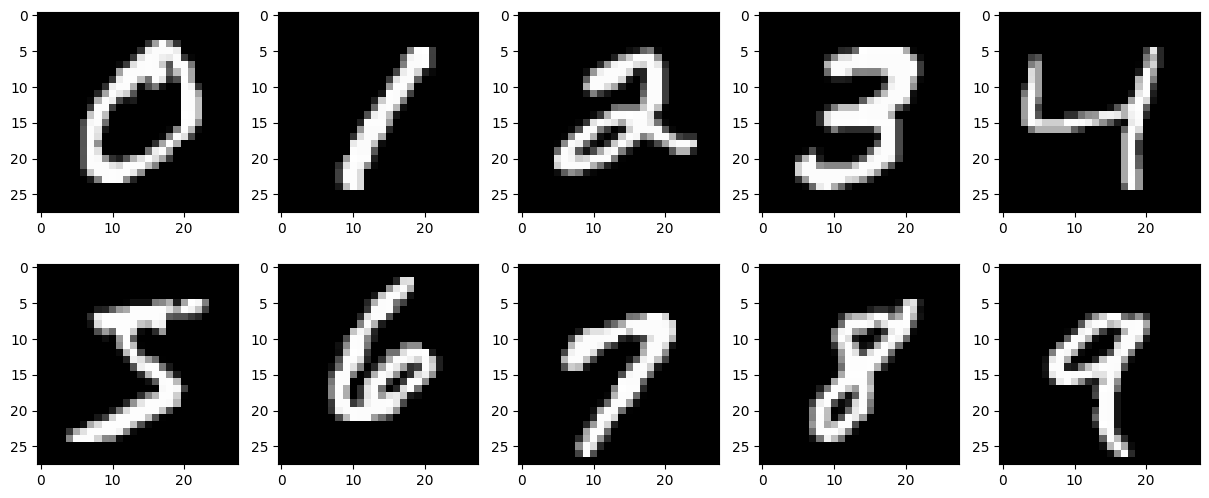

In [4]:
# sample labels

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[y_train==i][0], cmap='gray')
plt.show()

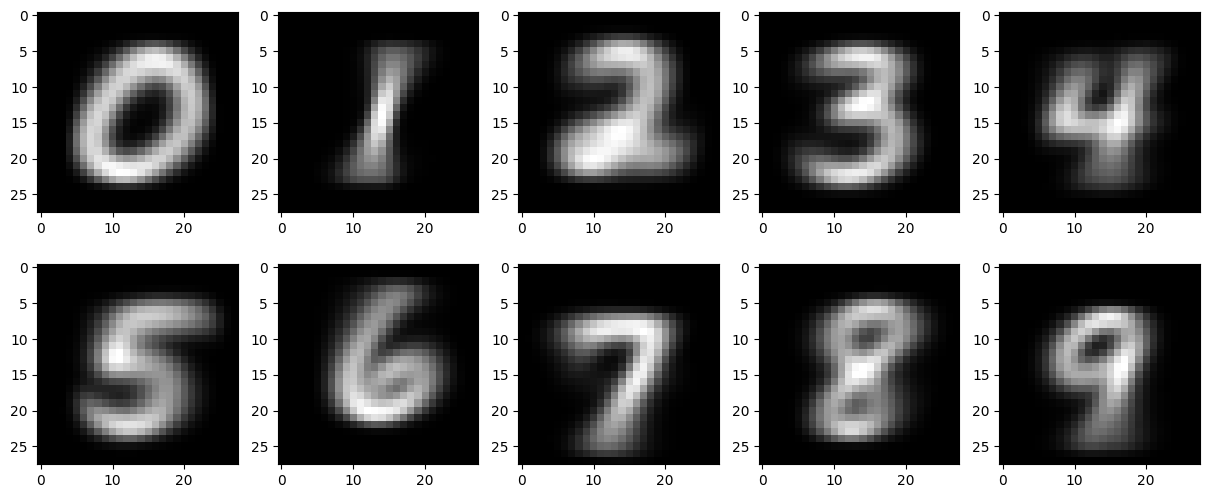

In [5]:
# average view of each labels

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[y_train==i].mean(axis=0), cmap='gray')
plt.show()

In [6]:
# data processing

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
# build model

model = tf.keras.Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [9]:
# compile and train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 33s 60ms/step - loss: 0.1218 - accuracy: 0.9619 - val_loss: 0.3216 - val_accuracy: 0.9822
Epoch 2/5
422/422 [==============================] - 23s 54ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 3/5
422/422 [==============================] - 23s 54ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 4/5
422/422 [==============================] - 23s 54ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0835 - val_accuracy: 0.9820
Epoch 5/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.0540 - val_accuracy: 0.9875


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0566 - accuracy: 0.9854


[0.05662458389997482, 0.9854000210762024]

In [11]:
model.save('models/mnist.h5')